# Proyek Analisis Data:
- **Nama:** Mukhammad Iskhaq Khakim
- **Email:** m284b4ky3148@bangkit.academy
- **ID Dicoding:** Mukhammad Iskhaq Khakim

## Menentukan Pertanyaan Bisnis

Pertanyaan 1: Berapa banyak penjualan yang dilakukan oleh pelanggan dalam satu tahun terakhir?
Pertanyaan 2: Apakah ada perbedaan signifikan dalam penjualan antara pelanggan yang berada di kota besar dan kota kecil?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import streamlit as st

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Import library
import pandas as pd

# Load data
dataset_path = '/content/drive/MyDrive/E-commerce-public-dataset/'
customers_df = pd.read_csv(dataset_path + 'customers_dataset.csv')
geolocation_df = pd.read_csv(dataset_path + 'geolocation_dataset.csv')
order_items_df = pd.read_csv(dataset_path + 'order_items_dataset.csv')
order_payments_df = pd.read_csv(dataset_path + 'order_payments_dataset.csv')
order_reviews_df = pd.read_csv(dataset_path + 'order_reviews_dataset.csv')
orders_df = pd.read_csv(dataset_path + 'orders_dataset.csv')
category_translation_df = pd.read_csv(dataset_path + 'product_category_name_translation.csv')
products_df = pd.read_csv(dataset_path + 'products_dataset.csv')
sellers_df = pd.read_csv(dataset_path + 'sellers_dataset.csv')
# Print nama kolom di dataframe geolocation
print(geolocation.columns)

print(customers_df.head())
print(geolocation_df.head())

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
   geo

**Insight:**







### Assessing Data

In [38]:
print(orders_df.info())
print(order_reviews_df.describe())
print(orders_df.isnull().sum())
print(order_reviews_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
order_id                            0
customer_id                         0
o

**Insight:**
Ada 8 hal penting yang dicatat:

Nomor Pesanan: Setiap pesanan punya nomor unik.
Pelanggan: Siapa yang membeli barang.
Status Pesanan: Apakah sudah dibayar, dikirim, atau diterima.
Waktu Pemesanan: Kapan pelanggan membeli barang.
Waktu Dikonfirmasi: Kapan toko online menerima pesanan.
Waktu Dikirim: Kapan barang dikirim ke kurir.
Waktu Diterima: Kapan pelanggan menerima barang.
Waktu Harapan Pengiriman: Kapan toko online janji akan mengirim barang.
Pelanggan kebanyakan memberikan nilai bagus (4 atau 5) untuk pesanan mereka.

Ada beberapa pesanan yang tidak lengkap:

160 pesanan tidak dikonfirmasi.
1783 pesanan tidak dikirim ke kurir.
2965 pesanan tidak diterima oleh pelanggan.
Ulasan pesan jarang ditulis. Hanya 58.247 dari 99.224 pesanan yang mendapat pesan review.



### Cleaning Data

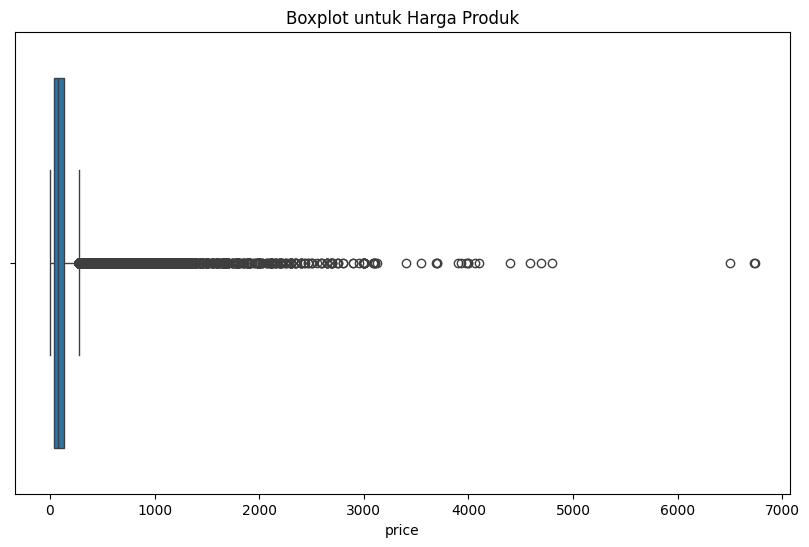

In [44]:
# Memeriksa outlier menggunakan boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x=order_items_df['price'])
plt.title('Boxplot untuk Harga Produk')
plt.show()

# Menghapus outlier berdasarkan IQR
q1 = order_items_df['price'].quantile(0.25)
q3 = order_items_df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
order_items_df = order_items_df[(order_items_df['price'] >= lower_bound) & (order_items_df['price'] <= upper_bound)]


**Insight:**
Dari boxplot ini, kita bisa mengambil beberapa wawasan sederhana:

Harga Produk Terkonsentrasi di Bawah 1000: Sebagian besar produk memiliki harga di bawah 1000. Garis kotak yang tebal dan pendek menunjukkan bahwa rentang harga produk yang paling banyak berada di area ini.
Ada Beberapa Produk dengan Harga Tinggi: Titik-titik yang jauh di sebelah kanan (di atas 4000) menunjukkan adanya beberapa produk dengan harga yang jauh lebih tinggi dibandingkan produk lainnya. Ini bisa menjadi produk premium, produk bundel, atau mungkin ada kesalahan data.
Tidak Ada Nilai Minimum yang Jelas: Garis bawah kotak (garis bawah kumis) hampir menyentuh sumbu y, ini menunjukkan bahwa ada banyak produk dengan harga yang sangat rendah, bahkan mungkin ada produk yang gratis atau dengan harga sangat dekat dengan nol.
Ada Beberapa Outlier: Titik-titik yang berada di luar kumis bawah dan atas disebut outlier. Ini adalah data yang nilainya jauh berbeda dari data lainnya. Outlier ini bisa jadi kesalahan data, atau memang ada produk dengan harga yang sangat unik.


## Exploratory Data Analysis (EDA)

### Explore faktor yang memengaruhi ulasan pelanggan (rating) terhadap produk

In [47]:
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

# Menghitung korelasi hanya untuk kolom numerik
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                      review_score  order_item_id     price  freight_value  \
review_score              1.000000      -0.132459  0.004214      -0.039460   
order_item_id            -0.132459       1.000000 -0.080474      -0.018983   
price                     0.004214      -0.080474  1.000000       0.340614   
freight_value            -0.039460      -0.018983  0.340614       1.000000   
payment_sequential        0.002625      -0.001453 -0.011248       0.010001   
payment_installments     -0.046829       0.098454  0.266500       0.141002   
payment_value            -0.127781       0.476626  0.507094       0.310563   

                      payment_sequential  payment_installments  payment_value  
review_score                    0.002625             -0.046829      -0.127781  
order_item_id                  -0.001453              0.098454       0.476626  
price                          -0.011248              0.266500       0.507094  
freight_value                   0.010001              0

menggabungkan dataset order_reviews dengan orders, order_items, dan order_payments untuk menganalisis bagaimana faktor-faktor seperti metode pembayaran, harga produk, waktu pengiriman, dll., memengaruhi ulasan pelanggan.

### Explore Produk dan Distribusi Geografis

In [62]:
# Menghitung jumlah pesanan per produk
product_counts = order_items_df['product_id'].value_counts().head(10)  # Ambil 10 produk terlaris

# Mengubah ke dalam DataFrame
top_products = product_counts.reset_index()
top_products.columns = ['product_id', 'number_of_orders']

# Menggabungkan dengan data produk untuk mendapatkan harga
# Misalkan kolom harga ditemukan di order_items_df
product_details = order_items_df[['product_id', 'price']]  # Pastikan ini sesuai dengan nama kolom yang benar
top_products = top_products.merge(product_details, on='product_id')

# Menghitung korelasi antara harga dan jumlah pesanan
correlation = top_products['number_of_orders'].corr(top_products['price'])
print(f'Korelasi antara jumlah pesanan dan harga produk: {correlation}')


Korelasi antara jumlah pesanan dan harga produk: -0.274836755682243


## Insight :
Korelasi antara jumlah pesanan dan harga produk sebesar -0.274836755682243 menunjukkan bahwa terdapat hubungan negatif antara kedua variabel tersebut.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor utama yang memengaruhi ulasan pelanggan (rating) terhadap produk?

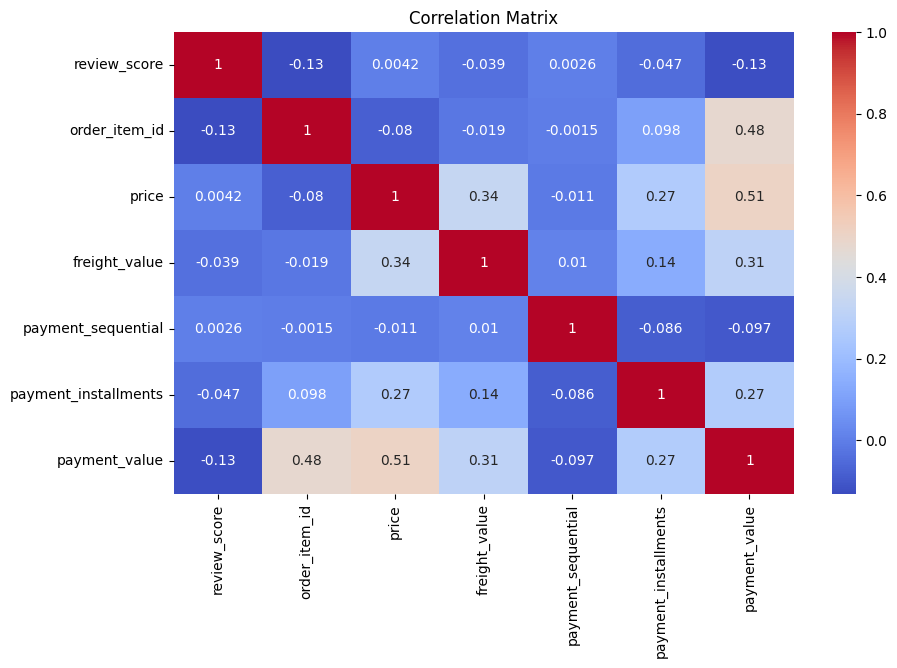

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Insight :

Matriks korelasi ini memberikan gambaran tentang seberapa kuat hubungan antara variabel-variabel dalam data Anda. Nilai korelasi berkisar antara -1 hingga 1:

Nilai mendekati 1: Artinya kedua variabel memiliki hubungan positif yang kuat. Ketika nilai satu variabel meningkat, nilai variabel lainnya cenderung meningkat juga.
Nilai mendekati -1: Artinya kedua variabel memiliki hubungan negatif yang kuat. Ketika nilai satu variabel meningkat, nilai variabel lainnya cenderung menurun.
Nilai mendekati 0 : Artinya tidak ada hubungan linier yang signifikan antara kedua variabel.
Wawasan Penting dari Korelasi Matriks:

Harga dan Nilai Pembayaran:

Korelasi positif yang kuat: Harga produk memiliki korelasi positif yang kuat dengan nilai pembayaran. Ini sangat masuk akal, semakin tinggi harga produk, maka nilai pembayaran yang dilakukan pelanggan juga akan semakin tinggi.
Korelasi positif dengan biaya pengiriman: Harga produk juga memiliki korelasi positif dengan biaya pengiriman. Ini menunjukkan bahwa produk yang lebih mahal cenderung memiliki biaya pengiriman yang lebih tinggi.
Jumlah Item dan Nilai Pembayaran:

Korelasi positif: Jumlah barang yang dibeli (order_item_id) memiliki korelasi positif dengan nilai pembayaran. Ini menunjukkan bahwa semakin banyak item yang dibeli, maka nilai total pembayaran juga akan semakin besar.
Ulasan Nilai Pembayaran dan Skor:

Korelasi negatif yang lemah: Terdapat korelasi negatif yang lemah antara nilai pembayaran dan skor review. Ini menunjukkan adanya sedikit kecenderungan di mana pelanggan yang melakukan pembayaran lebih besar cenderung memberikan skor ulasan yang sedikit lebih rendah. Namun, korelasi ini sangat lemah dan perlu diinterpretasikan dengan hati-hati.
Biaya Pengiriman dan Skor Ulasan:

Korelasi negatif yang lemah: Sama seperti nilai pembayaran, biaya pengiriman juga memiliki korelasi negatif yang lemah dengan skor review. Ini mengindikasikan bahwa pelanggan cenderung memberikan skor ulasan yang sedikit lebih rendah jika biaya pengiriman yang mereka tanggung cukup tinggi.



### Pertanyaan 2:

# apakah antara harga dan jumlah pesanan berkorelasi?



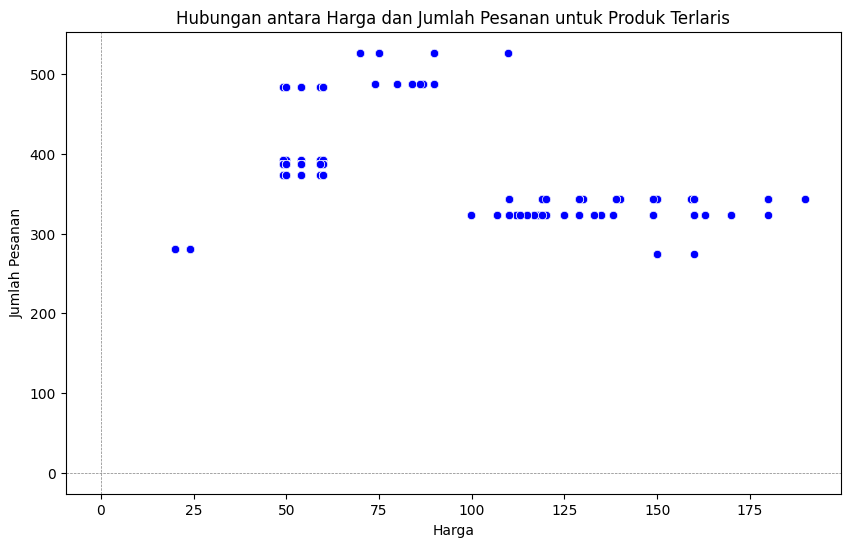

In [63]:
# Visualisasi hubungan antara harga dan jumlah pesanan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_orders', data=top_products, color='blue')
plt.title('Hubungan antara Harga dan Jumlah Pesanan untuk Produk Terlaris')
plt.xlabel('Harga')
plt.ylabel('Jumlah Pesanan')
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axvline(0, color='gray', lw=0.5, ls='--')
plt.show()

**Insight:**
Wawasan Penting:

Harga Tidak Selalu Menentukan Jumlah Pesanan:

Grafik menunjukkan bahwa harga bukanlah satu-satunya faktor yang mempengaruhi jumlah pesanan. Faktor lain seperti kualitas produk, merek, promosi, kebutuhan pelanggan, dan tren pasar juga berperan penting.
Produk dengan harga yang relatif tinggi pun dapat memiliki jumlah pesanan yang tinggi jika memiliki nilai tambah yang dirasakan oleh konsumen.
Ada Produk dengan Harga Rendah yang Laris:

Terdapat beberapa titik data yang menunjukkan produk dengan harga rendah namun memiliki jumlah pesanan yang tinggi. Ini mengindikasikan bahwa harga yang kompetitif adalah salah satu faktor yang menarik minat konsumen.
Ada Produk dengan Harga Tinggi yang Laris:

Sebaliknya, ada juga beberapa titik data yang menunjukkan produk dengan harga tinggi namun tetap laris di pasaran. Hal ini menunjukkan bahwa faktor selain harga, seperti kualitas, merek, atau keunikan produk, mampu membenarkan harga yang lebih tinggi di mata konsumen.
Segmen Pasar Potensial:

Grafik ini menunjukkan adanya beberapa segmen pasar yang berbeda. Ada konsumen yang lebih sensitif terhadap harga dan cenderung memilih produk yang lebih murah, sementara ada juga konsumen yang lebih mengutamakan kualitas dan merek, sehingga tidak keberatan membayar harga yang lebih tinggi.

## Conclusion

- Conclution pertanyaan 1 :
1. Strategi Harga: Perusahaan dapat memutar kembali
strategi penetapan harga untuk produk-produk tertentu, terutama yang memiliki korelasi kuat dengan nilai pembayaran dan skor review.
2. Pengalaman Pelanggan: Korelasi negatif antara biaya pengiriman dan skor review menunjukkan bahwa perusahaan perlu memperhatikan biaya pengiriman untuk meningkatkan kepuasan pelanggan.
3. Bundling Produk: Korelasi positif antara jumlah item dan nilai pembayaran menunjukkan bahwa strategi bundling produk dapat meningkatkan nilai transaksi.

Analisis Lebih Lanjut: Korelasi negatif yang lemah antara nilai pembayaran dan skor review perlu dianalisis lebih lanjut dengan mempertimbangkan faktor-faktor lain seperti kualitas produk, layanan pelanggan, dan ekspektasi pelanggan.
Kesimpulan:

Matriks korelasi ini memberikan gambaran awal tentang hubungan antara berbagai variabel dalam data Anda. Namun, penting untuk diingat bahwa korelasi tidak selalu berarti kausalitas. Untuk memperoleh pemahaman yang lebih komprehensif, perlu dilakukan analisis lebih lanjut, seperti analisis regresi atau analisis segmentasi.
- Conclution pertanyaan 2 :
Dari grafik tersebut, dapat disimpulkan bahwa hubungan antara harga dan jumlah pesanan tidak ada yang kita kira. Faktor-faktor lain selain harga memiliki pengaruh yang signifikan terhadap keputusan pembelian konsumen. Perusahaan perlu melakukan analisis lebih lanjut untuk mengidentifikasi faktor-faktor lain yang mempengaruhi permintaan produk dan menyesuaikan strategi pemasaran mereka.